###Social Analytics - Twitter API Sept 15, 2018

**Major news sources in the US (including BBC) are typically described as negative; but is this true?**. In the following analysis, we will put this status quo "all news in negative" to the test by utilizing a nifty package in Python called Vader Sentiment Analysis. Generally speaking, Vader uses an algorithm to score social media tweets' text under three categories: Positive, Negative or Neutral. Then, utilizing a 'z-score', Vader normalizes the three scores to form a Compound score on a scale from -1 to 1 (1 being the most positive and -1 being the most negative).

*The most positive*:
In our analysis, it is evident that BBC news had the highest propensity to positive tweeting (as well as negative): starting out with some highly negative and then highly positive tweets (Max compound score at 0.3038 polarity), before tapering to mid singles (0.05-.08). The second most positive tweets came from CBS, not surprising, which started out positive and then tapered off to 0.03 - 0.04. 

*The most negative*:
The New York Times was the most negative news source of all with av average compound score of 0.00265. 

Despite the differences in news coverage, the five sources all seem to converge to a moderately positive but basically neutral twitter sentiment. Interestingly, I pulled tweets once around 0630 PM and then again at 0705 PM, and BBC had the widest swing in polarity but still remained the most positive. At my 0630 PM pull, BBC had zero negative tweets. 



*Source: Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.*

In [3]:
#First imprt depenedencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [5]:
#Setup our Tweepy API Authentication settings
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [107]:
#Target Users
target_users = ['@BBC','@CBS','@CNN','@FoxNews','@nytimes']


#Initialize lusts and counter for looping 

tweets_ago = 1

# List to hold results
results_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through all target users
for target in target_users:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    

    # Loop through 10 times
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=20, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

                      
                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                text = tweet["text"]
                time_tweet = tweet["created_at"]

                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                
                
                # Set the new oldest_tweet value
                

                # Store the Average Sentiments
                results_list.append( {
                "User": target,
                "Text": text,
                "Time of Tweet": time_tweet,
                "Compound": np.mean(compound_list),
                "Positive": np.mean(positive_list),
                "Neutral": np.mean(negative_list),
                "Negative": np.mean(neutral_list),
                "Tweet Count": len(compound_list),
                "Tweets Ago": tweets_ago
                })

                #increment counter
                tweets_ago += 1
    
# Append airline results to 'results_list'


print(results_list)

[{'User': '@BBC', 'Text': 'RT @TomLondon6: Why does @BBC give more airtime to Julia Hartley-Brewer @JuliaHB1 than to the entire 13.5 million people in the UK living i…', 'Time of Tweet': 'Sun Sep 16 02:10:15 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 0.0, 'Negative': 1.0, 'Tweet Count': 1, 'Tweets Ago': 1}, {'User': '@BBC', 'Text': "@BBC @HoneyBadgerBite Thanks for retweeting.\nUnimaginably evil, I can't imagine the trauma... The only upside is th… https://t.co/UIgN517SG9", 'Time of Tweet': 'Sun Sep 16 02:10:11 +0000 2018', 'Compound': -0.1806, 'Positive': 0.065, 'Neutral': 0.0985, 'Negative': 0.8365, 'Tweet Count': 2, 'Tweets Ago': 2}, {'User': '@BBC', 'Text': 'RT @judithnwana: #Cameroon: Student police officers to reinforce security ahead of Presidential election as #SouthernCameroons conflict esc…', 'Time of Tweet': 'Sun Sep 16 02:09:19 +0000 2018', 'Compound': -0.11180000000000001, 'Positive': 0.084, 'Neutral': 0.10466666666666667, 'Negative': 0.8113333333333334, 'Tw

In [108]:
news_sent_df = pd.DataFrame.from_dict(results_list)
news_sent_df.to_csv("Twitter News Sentiment.csv")

In [109]:
news_sent_df.describe()


,Compound,Negative,Neutral,Positive,Tweet Count,Tweets Ago
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.031400,0.826277,0.078243,0.095392,250.500000,250.500000
std,0.029593,0.022606,0.004653,0.020046,144.481833,144.481833
min,-0.180600,0.737111,0.000000,0.000000,1.000000,1.000000
25%,0.017351,0.811018,0.076653,0.080467,125.750000,125.750000
50%,0.026243,0.832610,0.077657,0.089302,250.500000,250.500000
75%,0.042200,0.843606,0.079610,0.108987,375.250000,375.250000
max,0.219580,1.000000,0.104667,0.186444,500.000000,500.000000


In [111]:
#lets make a quick pair plot with seaborn to see variables against each other
uniques = news_sent_df["User"].unique()
print(uniques)
news_sent_df.head(15)










['@BBC' '@CBS' '@CNN' '@FoxNews' '@nytimes']


,Compound,Negative,Neutral,Positive,Text,Time of Tweet,Tweet Count,Tweets Ago,User
0,0.000000,1.000000,0.000000,0.000000,RT @TomLondon6: Why does @BBC give more airtim...,Sun Sep 16 02:10:15 +0000 2018,1,1,@BBC
1,-0.180600,0.836500,0.098500,0.065000,@BBC @HoneyBadgerBite Thanks for retweeting.\n...,Sun Sep 16 02:10:11 +0000 2018,2,2,@BBC
2,-0.111800,0.811333,0.104667,0.084000,RT @judithnwana: #Cameroon: Student police off...,Sun Sep 16 02:09:19 +0000 2018,3,3,@BBC
3,0.016625,0.797000,0.098250,0.104750,RT @georgegalloway: Dear @BBC In 2002 #JohnMal...,Sun Sep 16 02:09:15 +0000 2018,4,4,@BBC
4,0.013300,0.837600,0.078600,0.083800,@BBC @bbcthree More money for @bbcthree!,Sun Sep 16 02:09:10 +0000 2018,5,5,@BBC
5,0.002483,0.820333,0.088167,0.091333,RT @Secominfo: Colonial Dogvernor tries to per...,Sun Sep 16 02:07:41 +0000 2018,6,6,@BBC
6,0.059543,0.810857,0.086857,0.102143,RT @georgegalloway: Dear @BBC In 2002 #JohnMal...,Sun Sep 16 02:07:32 +0000 2018,7,7,@BBC
7,0.102337,0.803750,0.085875,0.110250,RT @georgegalloway: Dear @BBC In 2002 #JohnMal...,Sun Sep 16 02:06:44 +0000 2018,8,8,@BBC
8,0.177378,0.737111,0.076333,0.186444,"@Darksonic22 @BBC Agree, agree, agree!",Sun Sep 16 02:06:44 +0000 2018,9,9,@BBC
9,0.219580,0.748300,0.068700,0.182900,RT @marvelous_lie: @BBC @GyakutennoMeg And yet...,Sun Sep 16 02:05:18 +0000 2018,10,10,@BBC


In [112]:
BBC_set = news_sent_df[news_sent_df["User"]=="@BBC"]
print(BBC_set.describe())



         Compound    Negative     Neutral    Positive  Tweet Count  Tweets Ago
count  100.000000  100.000000  100.000000  100.000000   100.000000  100.000000
mean     0.069697    0.795075    0.080675    0.124113    50.500000   50.500000
std      0.041947    0.024592    0.009488    0.019835    29.011492   29.011492
min     -0.180600    0.737111    0.000000    0.000000     1.000000    1.000000
25%      0.064206    0.790087    0.079826    0.121482    25.750000   25.750000
50%      0.069058    0.794486    0.081921    0.123846    50.500000   50.500000
75%      0.079111    0.797070    0.082920    0.128835    75.250000   75.250000
max      0.219580    1.000000    0.104667    0.186444   100.000000  100.000000


In [113]:
CBS_set = news_sent_df[news_sent_df["User"]=="@CBS"]
CBS_set.describe()

,Compound,Negative,Neutral,Positive,Tweet Count,Tweets Ago
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.036865,0.814586,0.079752,0.105545,150.500000,150.500000
std,0.010345,0.008882,0.001725,0.007341,29.011492,29.011492
min,0.020404,0.793851,0.076970,0.095082,101.000000,101.000000
25%,0.028051,0.808035,0.078470,0.099435,125.750000,125.750000
50%,0.035560,0.815786,0.079508,0.104272,150.500000,150.500000
75%,0.044664,0.822031,0.080715,0.110602,175.250000,175.250000
max,0.059987,0.827723,0.084904,0.122723,200.000000,200.000000


In [114]:
CNN_set = news_sent_df[news_sent_df["User"]=="@CNN"]
CNN_set.describe()


,Compound,Negative,Neutral,Positive,Tweet Count,Tweets Ago
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.026658,0.832049,0.077776,0.090095,250.500000,250.500000
std,0.002014,0.003573,0.000585,0.003299,29.011492,29.011492
min,0.021192,0.825618,0.076712,0.084959,201.000000,201.000000
25%,0.025112,0.829205,0.077389,0.087234,225.750000,225.750000
50%,0.026964,0.832251,0.077712,0.089813,250.500000,250.500000
75%,0.028427,0.835003,0.078126,0.092837,275.250000,275.250000
max,0.029373,0.837917,0.079564,0.096311,300.000000,300.000000


In [115]:
FoxNews_Set = news_sent_df[news_sent_df["User"]=="@FoxNews"]
FoxNews_Set.describe()

,Compound,Negative,Neutral,Positive,Tweet Count,Tweets Ago
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.021166,0.841613,0.076294,0.082035,350.500000,350.500000
std,0.003847,0.002218,0.000648,0.001681,29.011492,29.011492
min,0.014591,0.836395,0.074987,0.079161,301.000000,301.000000
25%,0.018212,0.839788,0.075798,0.080589,325.750000,325.750000
50%,0.021133,0.841787,0.076265,0.081866,350.500000,350.500000
75%,0.023907,0.843590,0.076717,0.083532,375.250000,375.250000
max,0.029780,0.845211,0.078017,0.085522,400.000000,400.000000


In [116]:
NYT_Set = news_sent_df[news_sent_df["User"]=="@nytimes"]
NYT_Set.describe()

,Compound,Negative,Neutral,Positive,Tweet Count,Tweets Ago
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.002615,0.848061,0.076718,0.075170,450.500000,450.500000
std,0.007192,0.001556,0.000825,0.002338,29.011492,29.011492
min,-0.009315,0.845071,0.074911,0.071331,401.000000,401.000000
25%,-0.003238,0.846703,0.076098,0.073095,425.750000,425.750000
50%,0.001533,0.848046,0.076811,0.074983,450.500000,450.500000
75%,0.008116,0.849474,0.077376,0.077172,475.250000,475.250000
max,0.017593,0.850676,0.078133,0.079756,500.000000,500.000000


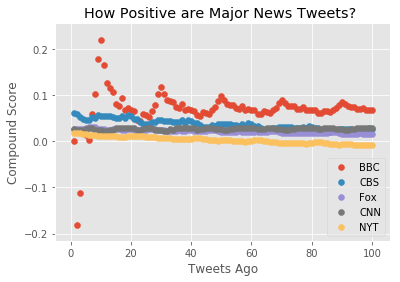

In [117]:
#BBC Scatter Plot 
x_axis = np.arange(1,101,1)
#print(x_axis)
#Make it pretty with R's ggplot2 style (oh so good!) but for some reason ggplot in python wouldnt load :(
plt.style.use('ggplot')
BBC_plot = plt.scatter(x_axis,BBC_set["Compound"], alpha = 0.99, label = "BBC")
CBS_plot = plt.scatter(x_axis,CBS_set["Compound"], alpha = 0.99,label = "CBS")
Fox_plot = plt.scatter(x_axis,FoxNews_Set["Compound"], alpha = 0.99,label = "Fox")
CNN_plot = plt.scatter(x_axis,CNN_set["Compound"], alpha = 0.99,label = "CNN")
NYT_plot = plt.scatter(x_axis,NYT_Set["Compound"],alpha = 0.99,label = "NYT")


plt.xlabel('Tweets Ago')
plt.ylabel('Compound Score')
plt.title(f"How Positive are Major News Tweets? ")
plt.legend(handles = [BBC_plot,CBS_plot,Fox_plot,CNN_plot,NYT_plot], loc = "best")
#plt.annotate(equation,(80,60))
plt.savefig('Analysis of Tweets by New Source (last 100).png')

          Compound
User              
@BBC      0.069697
@CBS      0.036865
@CNN      0.026658
@FoxNews  0.021166
@nytimes  0.002615


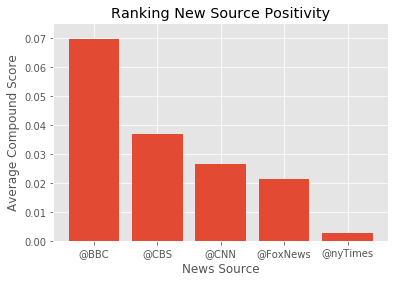

In [119]:
#Combine averages into a dataframe; I am using pivot table bahahahahahahaah
news_combined_df = pd.pivot_table(news_sent_df, values = 'Compound',index = 'User',
                              aggfunc = np.mean)
news_combined_df_2 = pd.DataFrame(news_combined_df)
print(news_combined_df_2)
x = np.arange(5)
plt.bar(x, news_combined_df_2["Compound"])

#plt.xticks(x,news_combined_df_2["User"])
plt.xlabel('News Source')
plt.ylabel('Average Compound Score')
plt.title(f"Ranking New Source Positivity")
tick_locations = [value for value in x]
plt.xticks(tick_locations, ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nyTimes"])
plt.ylim(0.0,0.075)


                               
#plt.annotate(equation,(80,60))
plt.savefig('Ranking New Source Positivity.png')